# Linear Vector Quantization

## data load

In [80]:
import pandas as pd

In [94]:
train_csv = pd.read_csv("LVQ_train.txt", delimiter = " ")
weight_csv = pd.read_csv("LVQ_initial.txt", delimiter = " ")
# train_data

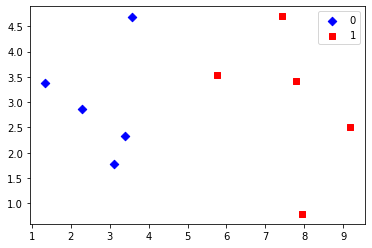

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(train_data.iloc[:5,0], train_data.iloc[:5,1], c="blue", marker="D", label="0")
plt.scatter(train_data.iloc[5:,0], train_data.iloc[5:,1], c="red", marker="s", label="1")
plt.legend()

## funcs

In [83]:
import numpy as np
def EuDist(a, b):
    return np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)

In [84]:
def weight_update(weight, train, lr):
    mul = 1 if weight[2] == train[2] else -1

    weight[0] = weight[0] + mul * lr * (train[0] - weight[0])
    weight[1] = weight[1] + mul * lr * (train[1] - weight[1])
    
    return weight

In [107]:
def LVQ_eval(weight, train):
    count = 0
    for i in range(0, len(train)):
        for key, value in dict_train.items():
            train.loc[i, key] = EuDist(train.loc[i, 'X1':'X2'], weight.loc[value, 'X1':'X2'])
        train.loc[i, 'BMU'] = train.loc[i, 'Dist_1':'Dist_4'].astype(float).idxmin(axis=1)
        pred = 0 if dict_train[train.loc[i, 'BMU']] < 2 else 1
        count = count + 1 if pred == train.loc[i, 'Y'] else count
    return count/len(train)

In [105]:
dict_train = {'Dist_1': 0, 'Dist_2': 1, 'Dist_3': 2, 'Dist_4':3}

def LVQ_train(MaxEpoch, alpha, weight, train):
    for epoch in range(0, MaxEpoch):
        lr = alpha * (1 - epoch /MaxEpoch)
        for i in range(0, len(train)):
            for key, value in dict_train.items():
                train.loc[i, key] = EuDist(train.loc[i, 'X1':'X2'], weight.loc[value, 'X1':'X2'])
            
            BMU_key = train.loc[i, 'Dist_1':'Dist_4'].astype(float).idxmin(axis=1)
            train.loc[i, 'BMU'] = BMU_key
            weight.iloc[dict_train[BMU_key], :] = weight_update(weight.iloc[dict_train[BMU_key], :], train.iloc[i, :3], lr)
        
        acc = LVQ_eval(weight, train.loc[:, 'X1':'Y'])
    return train, weight, acc

### OLD and UGLY code

In [ ]:
"""
def weight_update(weight_x1, weight_x2, weight_y, train_x1, train_x2, train_y, alpha):
    if weight_y == train_y:
        mul = 1
    else: 
        mul = -1
    weight_updated_x1 = weight_x1 + mul * alpha * (train_x1 - weight_x1)
    weight_updated_x2 = weight_x2 + mul * alpha * (train_x2 - weight_x2)
    
    return weight_updated_x1, weight_updated_x2
"""

In [ ]:
"""
def train(MaxEpoch, alpha, weight, train):
    
    for epoch in range(0, MaxEpoch):
        lr = alpha * (1 - epoch /MaxEpoch)
        for i in range(0, 1):
            train.loc[i, 'Dist_1'] = EuDist(train.loc[i, 'X1'], weight.loc[0, 'X1'],
                                    train.loc[i, 'X2'], weight.loc[0, 'X2'])
            train.loc[i, 'Dist_2'] = EuDist(train.loc[i, 'X1'], weight.loc[1, 'X1'],
                                    train.loc[i, 'X2'], weight.loc[1, 'X2'])
            train.loc[i, 'Dist_3'] = EuDist(train.loc[i, 'X1'], weight.loc[2, 'X1'],
                                    train.loc[i, 'X2'], weight.loc[2, 'X2'])
            train.loc[i, 'Dist_4'] = EuDist(train.loc[i, 'X1'], weight.loc[3, 'X1'],
                                    train.loc[i, 'X2'], weight.loc[3, 'X2'])
            train[['BMU']] = train[['Dist_1', 'Dist_2', 'Dist_3', 'Dist_4']].astype(float).idxmin(axis=1)
            
            if train.loc[i, 'BMU'] == 'Dist_1':
                weight.iloc[0, :] = weight_update_simple(weight.iloc[0, :], train.iloc[i, :3], alpha)
    return train, weight
"""

## training

### train processing

In [95]:
temp = pd.DataFrame(columns=['Dist_1', 'Dist_2', 'Dist_3', 'Dist_4', 'BMU'])
train = pd.concat([train_csv.copy(deep=True), temp], axis=1).astype(float)
train

,X1,X2,Y,Dist_1,Dist_2,Dist_3,Dist_4,BMU
0,3.393533,2.331273,0.0,NaN,NaN,NaN,NaN,NaN
1,3.110073,1.781540,0.0,NaN,NaN,NaN,NaN,NaN
2,1.343809,3.368361,0.0,NaN,NaN,NaN,NaN,NaN
3,3.582294,4.679179,0.0,NaN,NaN,NaN,NaN,NaN
4,2.280362,2.866990,0.0,NaN,NaN,NaN,NaN,NaN
5,7.423437,4.696523,1.0,NaN,NaN,NaN,NaN,NaN
6,5.745052,3.533990,1.0,NaN,NaN,NaN,NaN,NaN
7,9.172169,2.511101,1.0,NaN,NaN,NaN,NaN,NaN
8,7.792783,3.424089,1.0,NaN,NaN,NaN,NaN,NaN
9,7.939821,0.791637,1.0,NaN,NaN,NaN,NaN,NaN


In [111]:
MaxEpoch = 1
alpha = 0.7

update_train, update_weight, accuracy = LVQ_train(MaxEpoch, alpha, weight_csv.copy(deep=True), train_csv.copy(deep=True))
print(update_train)
print(update_weight)
print(accuracy)

         X1        X2  Y    Dist_1    Dist_2    Dist_3    Dist_4     BMU
0  3.393533  2.331273  0  1.551164  4.399250  4.577742  2.347906  Dist_1
1  3.110073  1.781540  0  0.351249  4.714868  4.950218  2.911471  Dist_1
2  1.343809  3.368361  0  2.434250  6.531832  6.615039  2.433026  Dist_4
3  3.582294  4.679179  0  2.895053  4.820880  4.719329  1.547440  Dist_4
4  2.280362  2.866990  0  1.410611  5.538391  5.659458  4.802983  Dist_1
5  7.423437  4.696523  1  5.316473  2.393914  1.901011  2.312501  Dist_3
6  5.745052  3.533990  1  3.333915  2.374812  1.933283  2.705429  Dist_3
7  9.172169  2.511101  1  6.612395  1.391058  3.120046  5.094075  Dist_2
8  7.792783  3.424089  1  5.305522  1.554845  1.526325  3.507331  Dist_3
9  7.939821  0.791637  1  5.659767  1.799056  2.785246  5.889700  Dist_2
         X1        X2    Y
0  2.559884  2.549261  0.0
1  6.048389  3.195024  0.0
2  7.343461  3.512290  1.0
3  5.700573  6.239053  1.0
0.9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
